In [1]:
# Add relevant Jupyter notebook extensions
def clearvars():    
    for el in sorted(globals()):
        if '__' not in el:
                print(f'deleted: {el}')
                del el
clearvars()

deleted: In
deleted: Out
deleted: _
deleted: _dh
deleted: _i
deleted: _i1
deleted: _ih
deleted: _ii
deleted: _iii
deleted: _oh
deleted: clearvars
deleted: exit
deleted: get_ipython
deleted: open
deleted: quit


In [2]:
# You can double-check your Python path like this...

import sys  


# Adds the B1-CODING-PRACTICAL-MT24 directory to the Python path




# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

arr


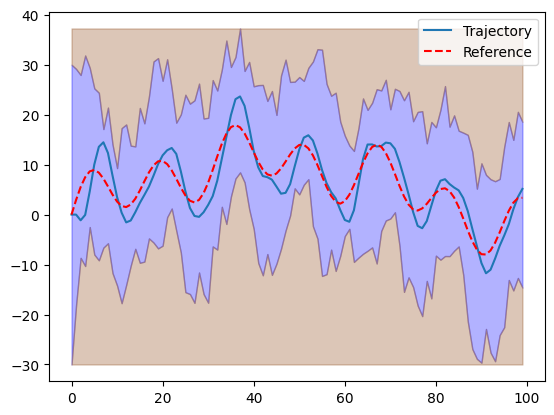

In [3]:
# Import relevant modules
import os
sys.path.append(os.path.abspath('..'))
from uuv_mission.dynamic import *
from uuv_mission.terrain import *
from uuv_mission.control import *
sub = Submarine()
# Instantiate your controller (depending on your implementation)
closed_loop = ClosedLoop(sub)
mission = Mission.from_csv(r"C:\Users\benji\OneDrive - Nexus365\Catz Engineering\year 3\Standard\B1\code\python\b1-coding-practical-mt24\data\mission.csv")

trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)